# Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# Data

In [3]:
data = pd.read_csv('../D_1_10/Data/laptopData_cleaned.csv')
data.head(2)

,Company,TypeName,OpSys,RAM_GB,GPU,GPU_Brand,CPU_model,CPU_GHz,Weight_KG,Price_Rupee,ScreenRes_width,ScreenRes_height,Inches,TouchScreen,Memory_Type1,Memory_Size1_GB,Memory_Type2,Memory_Size2_GB
0,Apple,Ultrabook,macOS,8,Intel Iris Plus Graphics 640,Intel,Intel Core i5,2.3,1.37,71378.6832,2560,1600,13.3,No,SSD,128,No second memory,0
1,Apple,Ultrabook,macOS,8,Intel HD Graphics 6000,Intel,Intel Core i5,1.8,1.34,47895.5232,1440,900,13.3,No,Flash Storage,128,No second memory,0


# 1) Basic Probability: Single Events

In [4]:
p_touchscreen = (data['TouchScreen'] == 'Yes').mean()
print(f"Probability of TouchScreen: {p_touchscreen*100:.2f}%")
p_apple = (data['Company'] == 'Apple').mean()
print(f"Probability of Apple: {p_apple*100:.2f}%")
p_ram_larger_equal_16 = (data['RAM_GB'] >= 16).mean()
print(f"Probability of RAM >= 16GB: {p_ram_larger_equal_16*100:.2f}%")
p_cpu_i7 = (data['CPU_model'] == 'Intel Core i7').mean()
print(f"Probability of Intel Core i7: {p_cpu_i7*100:.2f}%")

Probability of TouchScreen: 14.56%
Probability of Apple: 1.65%
Probability of RAM >= 16GB: 17.07%
Probability of Intel Core i7: 0.31%


# 2) Joint Probability

In [ ]:
# how many laptops are from dell and have touchscreen
p_dell_touchscreen = ((data['Company'] == 'Dell') & (data['TouchScreen'] == 'Yes')).mean()
print(f"Probability of Dell with TouchScreen: {p_dell_touchscreen * 100:.2f}%")

Probability of Dell with TouchScreen: 4.80%


In [ ]:
# gpu
p_nvidia_ram = ((data['GPU_Brand'] == 'Nvidia') & (data['RAM_GB'] >= 16)).mean()
print(f"Probability of Nvidia with RAM over 16 GB: {p_nvidia_ram * 100:.2f}%")

Probability of Nvidia with RAM over 16 GB: 11.49%


# 3) Conditional Probability

Conditional Probability: $$ P(A|B) = \frac{P(A,B)}{P(B)}$$

Source: [Medium](https://jdatascientist.medium.com/data-science-with-the-penguins-data-set-conditional-propability-bd998bfedd35)

In [8]:
p_touch_hp = data[data['Company'] == 'HP']['TouchScreen'].value_counts(normalize=True).get('Yes', 0)
print(f"Probability of HP with TouchScreen: {p_touch_hp * 100:.2f}%")

Probability of HP with TouchScreen: 9.40%


In [9]:
ssd = data[data['Memory_Type1'] == 'SSD']
p_sdd_price = ssd[ssd['Price_Rupee'] >= 100000]['Price_Rupee'].count() / ssd['Price_Rupee'].count()
print(f"Probability of SSD laptops over 100,000 Rupees: {p_sdd_price * 100:.2f}%")

Probability of SSD laptops over 100,000 Rupees: 20.24%


In [10]:
p_touch_hp = data[data['Company'] == 'HP']['TouchScreen'].value_counts(normalize=True).get('Yes', 0)
print(f"Probability of HP with TouchScreen: {p_touch_hp * 100:.2f}%")

Probability of HP with TouchScreen: 9.40%


# 4) Probability Distributions (empirical)

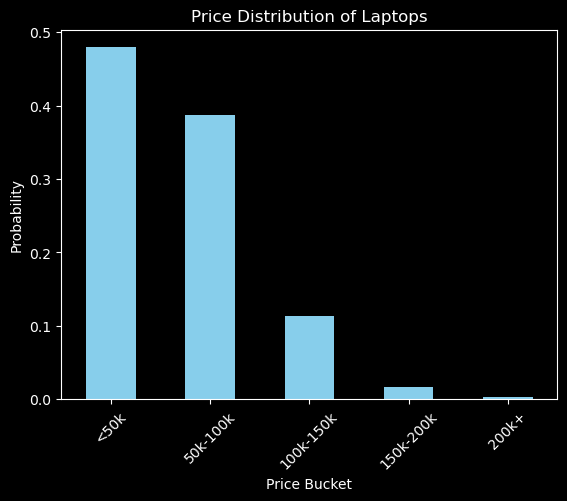

In [11]:
data['Price_bucket'] = pd.cut(data['Price_Rupee'], bins=[0, 50000, 100000, 150000, 200000, 250000], labels=['<50k',
    '50k-100k', '100k-150k', '150k-200k', '200k+'])
data['Price_bucket'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Price Distribution of Laptops')
plt.xlabel('Price Bucket')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.show()

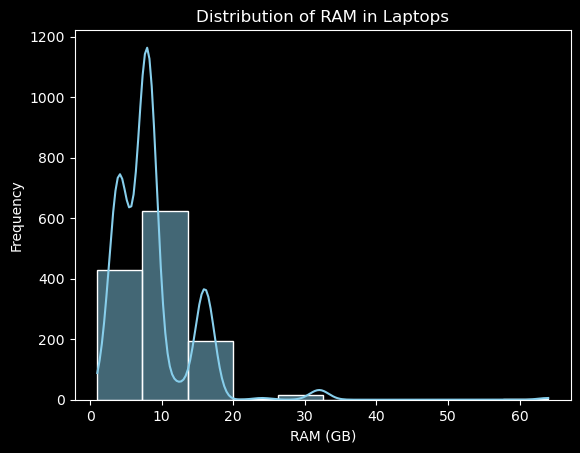

In [12]:
sns.histplot(data=data, x='RAM_GB', bins=10, kde=True, color='skyblue')
plt.title('Distribution of RAM in Laptops')
plt.xlabel('RAM (GB)')
plt.ylabel('Frequency')
plt.show()

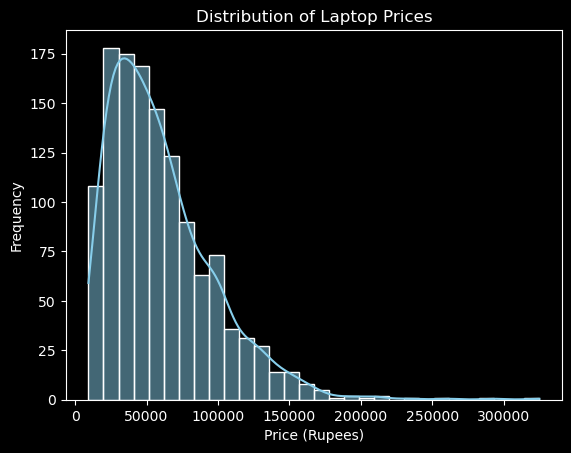

In [13]:
sns.histplot(data['Price_Rupee'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price (Rupees)')
plt.ylabel('Frequency')
plt.show()

# 5) Bayes Theorem

Theorem: $$ P(A|B) = \frac{P(B|A) P(A)}{P(B)}$$

In [35]:
p_apple = (data['Company'] == 'Apple').mean()
p_touch = (data['TouchScreen'] == 'Yes').mean()
p_touch_given_apple = data[data['Company'] == 'Apple']['TouchScreen'].value_counts(normalize=True).get('Yes', 0)

In [37]:
p_apple_given_touch = p_touch_given_apple * p_apple / p_touch
print(f"P(Brand = Apple | Touchscreen = Yes) = {p_apple_given_touch:.4f}")

P(Brand = Apple | Touchscreen = Yes) = 0.0000


# 6) Simulating Events

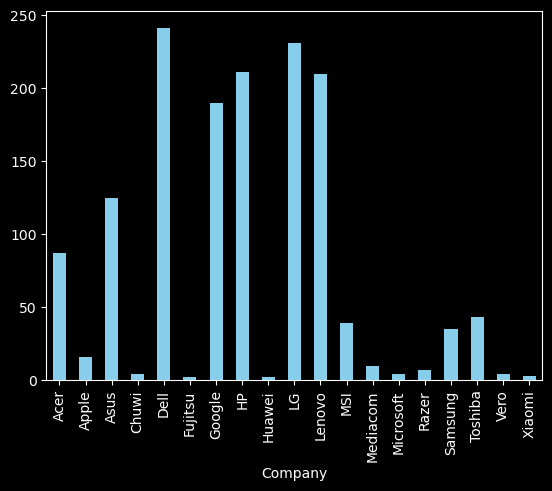

In [39]:
data.sample(n=1000, replace=True).groupby('Company').size().plot(kind='bar', color='skyblue')
plt.show()

In [40]:
data['TouchScreen'] = data['TouchScreen'].str.strip().str.lower()
simulated_purchases = data.sample(n=1000, replace=True, random_state=42)
# Count how many have touchscreen = 'yes'
num_touchscreen = (simulated_purchases['TouchScreen'] == 'yes').sum()

# Calculate proportion
p_touchscreen_simulated = num_touchscreen / 1000

# Output the result
print(f"Estimated P(Touchscreen from random purchase): {p_touchscreen_simulated:.2f} ({num_touchscreen} out of 1000)")

Estimated P(Touchscreen from random purchase): 0.14 (137 out of 1000)


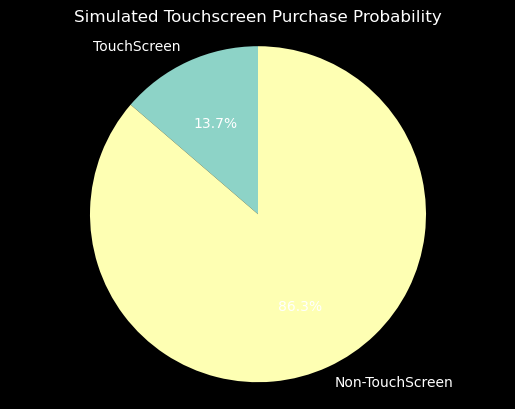

In [41]:
label = ['TouchScreen', 'Non-TouchScreen']
counts = [num_touchscreen, 1000 - num_touchscreen]
plt.pie(counts, labels=label, autopct='%1.1f%%', startangle=90)
plt.title("Simulated Touchscreen Purchase Probability")
plt.axis('equal')
plt.show()

Estimated Mean RAM over 500 simulations: 8.47 GB


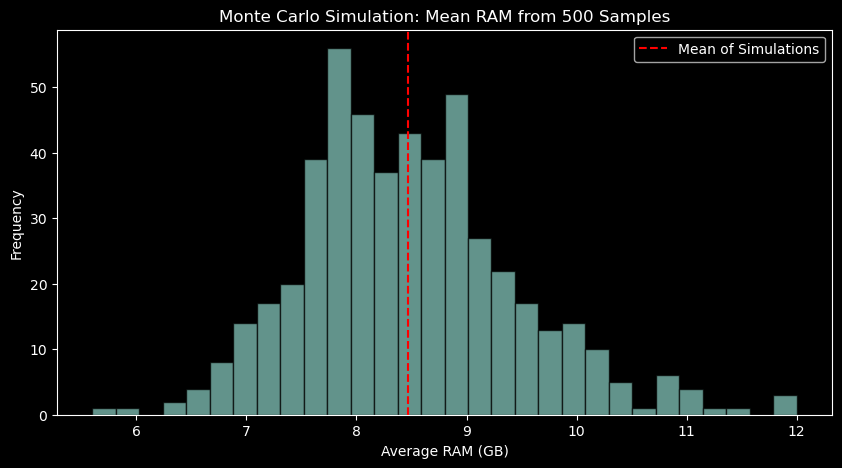

In [43]:
# Parameters
n_simulations = 500
sample_size = 30  # laptops per sample
mean_rams = []

# Monte Carlo simulation loop
for _ in range(n_simulations):
    sample = data['RAM_GB'].sample(n=sample_size, replace=True)
    mean_rams.append(sample.mean())

# Convert results to Series
mean_rams = pd.Series(mean_rams)

# Print summary
print(f"Estimated Mean RAM over {n_simulations} simulations: {mean_rams.mean():.2f} GB")

# Plot histogram of simulation results
plt.figure(figsize=(10, 5))
plt.hist(mean_rams, bins=30, edgecolor='black', alpha=0.7)
plt.title(f"Monte Carlo Simulation: Mean RAM from {n_simulations} Samples")
plt.xlabel("Average RAM (GB)")
plt.ylabel("Frequency")
plt.axvline(mean_rams.mean(), color='red', linestyle='dashed', linewidth=1.5, label='Mean of Simulations')
plt.legend()
plt.show()

# 7) Visualizing Probabilities

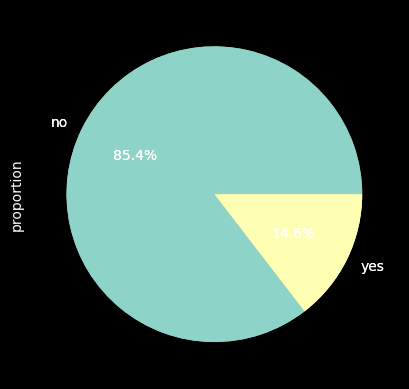

In [45]:
data['TouchScreen'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()